In [1]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt


In [2]:
seed_value = 259
def plotFun(var,xlabel_name, title_name):
    plt.figure(figsize=(10, 6))
    plt.hist(var, bins=30, color="skyblue", edgecolor="black")
    plt.title("Distribution of "+title_name, fontsize=16)
    plt.xlabel(xlabel_name, fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.axvline(np.mean(var), color='red', linestyle='dashed', linewidth=2, label=f"Mean: {np.mean(var):.2f}")
    plt.show()


## Make Age which is right skewed to normal distribution 

(array([25003.,  5157.,  4205.,  3519.,  2826.,  2624.,  1542.,  1266.,
          961.,  2897.]),
 array([18. , 23.2, 28.4, 33.6, 38.8, 44. , 49.2, 54.4, 59.6, 64.8, 70. ]),
 <BarContainer object of 10 artists>)

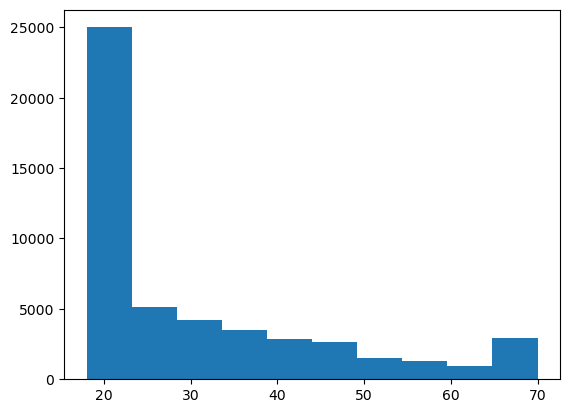

In [3]:
# Parameters
n_samples = 50_000  # Number of rows
age_min = 18        # Minimum age
age_max = 70        # Maximum age
age_mean = 28       # Target average age

# Generate ages using a gamma distribution (skewed)
# Gamma parameters are chosen to center the distribution around 28
shape = 2.0  # Shape parameter for gamma distribution
scale = age_mean / shape  # Scale parameter to achieve the desired mean
ages = np.random.gamma(shape, scale, n_samples)

# Clip ages to ensure they are within the range [18, 70]
ages = np.clip(ages, age_min, age_max)

# Round ages to integers
ages = np.round(ages).astype(int)
plt.hist(ages)

## Gender is a categorical variable,randomly assign 0 or 1 to each person

(array([22422.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 27578.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

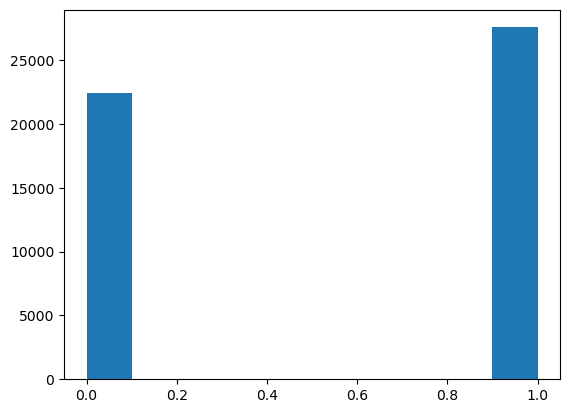

In [4]:
gender = np.random.choice([1,0], n_samples, p = [0.55, 0.45])
plt.hist(gender)

In [5]:
race = ["White", "Black", "Hispanic", "Asian", "Other"]
prob = [0.45, 0.15, 0.25, 0.10, 0.05]

races = np.random.choice(race, n_samples, p = prob)

# Has home or rental

(array([35101.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 14899.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

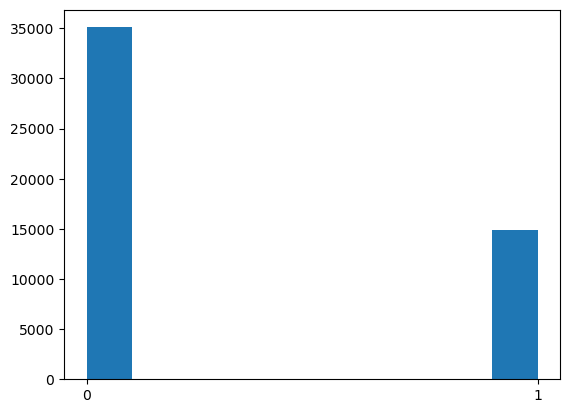

In [6]:
house = np.random.choice(["1","0"], n_samples, p = [0.3, 0.7])
plt.hist(house)

## Employment Type

## Employment is related with age

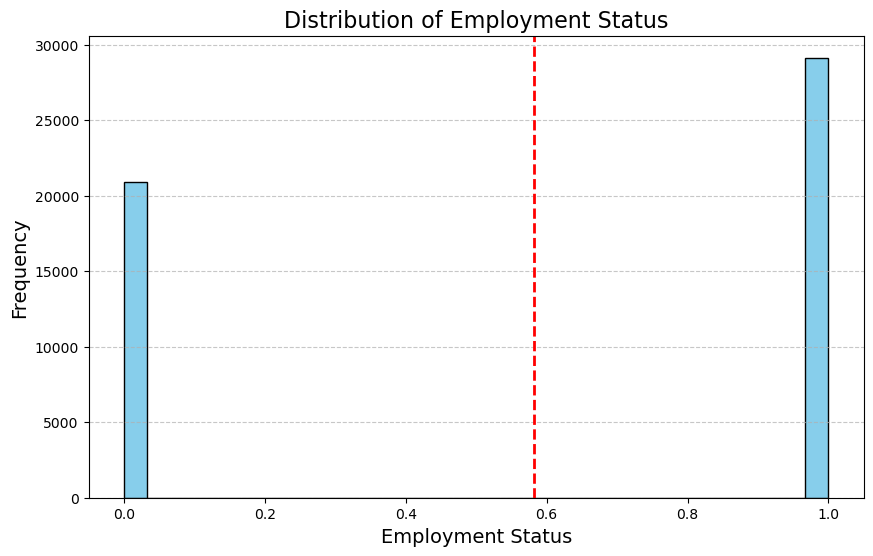

In [7]:
employment_status = []
for i in ages:
    if i < 25:
        employment_status.append(np.random.choice([1, 0], p=[0.4, 0.6]))
    elif i < 35:
        employment_status.append(np.random.choice([1, 0], p=[0.6, 0.4]))
    else:
        employment_status.append(np.random.choice([1, 0], p=[0.9, 0.1]))
plotFun(employment_status, "Employment Status", "Employment Status")

In [8]:
df = pl.DataFrame(
    {
        "age": pl.Series(ages),
        "is_male": pl.Series(gender),
        "race": pl.Series(races),
        "ownes_house": pl.Series(house),
        "employment_status": pl.Series(employment_status)})
df.head(10)

age,is_male,race,ownes_house,employment_status
i32,i32,str,str,i32
18,1,"""Hispanic""","""0""",0
22,1,"""White""","""1""",0
18,1,"""Asian""","""0""",0
18,0,"""Black""","""1""",0
56,0,"""Black""","""0""",1
21,1,"""White""","""0""",0
44,1,"""White""","""0""",1
31,1,"""White""","""1""",1
21,0,"""Hispanic""","""0""",1


## Making Employment Income
### Gender has impact in employment income in our dataset

In [9]:
employment_income = []
for i in range(n_samples):
    if employment_status[i] == 1:  # Only employed individuals have income
        # Base income increases linearly with age
        base_income = 2500 * ages[i]  # Linear relationship: income = 1000 * age
        
        # Add gender-based adjustment
        if gender[i] == 1:  # Male
            base_income += 10000  # Males earn slightly more
        else:  # Female
            base_income += 8000  # Females earn slightly less
        
        # Add random noise and occasional bonuses
        income = base_income + np.random.normal(10000, 4000)  # Add some randomness
        if ages[i] <30:
            income += np.random.choice([0, 20000], p=[0.999, 0.001])
        elif ages[i] < 50:
            income += np.random.choice([0, 50000], p=[0.95, 0.05])
        else:
            income += np.random.choice([0, 60000], p=[0.9, 0.1])

        
        
        employment_income.append(round(income,1))
    else:  # Unemployed individuals have 0 income
        employment_income.append(0)

In [10]:
non_employment_income = np.random.choice([0, 1000, 5000,10000,12000], n_samples, p=[0.5, 0.05, 0.05, 0.2, 0.2])

In [20]:
df = pl.DataFrame(
    {
        "age": pl.Series(ages),
        "is_male": pl.Series(gender),
        "race": pl.Series(races),
        "ownes_house": pl.Series(house),
        "employment_status": pl.Series(employment_status),
        "employment_income": pl.Series(employment_income,dtype=pl.Float64),
        "non_employment_income": pl.Series(non_employment_income,dtype=pl.Float64)})
df.head(10)

age,is_male,race,ownes_house,employment_status,employment_income,non_employment_income
i32,i32,str,str,i32,f64,f64
18,0,"""White""","""0""",0,0.0,0.0
22,0,"""White""","""1""",1,71512.0,0.0
18,1,"""White""","""1""",1,58287.6,9000.0
18,0,"""White""","""1""",1,69786.9,0.0
23,0,"""Other""","""0""",1,69507.0,0.0
68,1,"""White""","""0""",1,232942.1,12000.0
30,1,"""White""","""1""",1,92158.8,12000.0
18,1,"""Asian""","""0""",1,62839.9,12000.0
26,1,"""Black""","""0""",1,85679.5,12000.0


In [21]:
treatment = np.random.choice([1, 0], n_samples, p=[0.2, 0.8])
df= df.with_columns([
    pl.Series("treatment", treatment)])
df.head(10)


age,is_male,race,ownes_house,employment_status,employment_income,non_employment_income,treatment
i32,i32,str,str,i32,f64,f64,i32
18,0,"""White""","""0""",0,0.0,0.0,0
22,0,"""White""","""1""",1,71512.0,0.0,0
18,1,"""White""","""1""",1,58287.6,9000.0,1
18,0,"""White""","""1""",1,69786.9,0.0,0
23,0,"""Other""","""0""",1,69507.0,0.0,0
68,1,"""White""","""0""",1,232942.1,12000.0,0
30,1,"""White""","""1""",1,92158.8,12000.0,0
18,1,"""Asian""","""0""",1,62839.9,12000.0,0
26,1,"""Black""","""0""",1,85679.5,12000.0,0


## Making expenditure
### Treatment has impact in the expenditure. However, gender, race and age all plays role in the expenditure. There is also interaction between them

In [22]:
expenditure = []    
for i in range(n_samples):
    
    if treatment[i] == 1:
        
        if employment_status[i] == 1:
            expenditure_general = np.random.normal(0.8, 0.1) *  employment_income[i] + np.random.normal(0.2, 0.005) *  non_employment_income[i]
            
            if gender[i] == 0: #female
                if races[i] == "White":
                    expenditure_general += 300 + ages[i] * 10
                elif races[i] == "Asian":
                    expenditure_general += 200 + ages[i] * 8
                else:
                    expenditure_general += 70 + ages[i] * 7
                
            else: #male
                if races[i] == "Black":
                    expenditure_general += 200 + ages[i] * 10
                elif races[i] == "Hispanic":
                    expenditure_general += 200 + ages[i] * 5
                else:
                    expenditure_general += 50 + ages[i] * 5
        else:
            expenditure_general = np.random.normal(3000,300)+ np.random.normal(0.8, 0.1) *  non_employment_income[i] 
    
    else:
        
        if employment_status[i] == 1:
            expenditure_general =  np.random.normal(0.7, 0.05) *  employment_income[i] + np.random.normal(0.2, 0.05) *  non_employment_income[i]
            
        else:
            expenditure_general = np.random.normal(2500,200) + np.random.normal(0.8, 0.2) *  non_employment_income[i]
    expenditure.append(round(expenditure_general,2))

        

In [23]:
df = df.with_columns([
    pl.Series("expenditure", expenditure)])
df.head(10)

age,is_male,race,ownes_house,employment_status,employment_income,non_employment_income,treatment,expenditure
i32,i32,str,str,i32,f64,f64,i32,f64
18,0,"""White""","""0""",0,0.0,0.0,0,2993.03
22,0,"""White""","""1""",1,71512.0,0.0,0,42829.0
18,1,"""White""","""1""",1,58287.6,9000.0,1,45194.99
18,0,"""White""","""1""",1,69786.9,0.0,0,51264.09
23,0,"""Other""","""0""",1,69507.0,0.0,0,49103.26
68,1,"""White""","""0""",1,232942.1,12000.0,0,168641.33
30,1,"""White""","""1""",1,92158.8,12000.0,0,67339.59
18,1,"""Asian""","""0""",1,62839.9,12000.0,0,40356.07
26,1,"""Black""","""0""",1,85679.5,12000.0,0,54805.69


### Write the dataset

In [24]:
df.write_csv("dataset.csv")


## New Data for program rollout

In [16]:
# Parameters
n_samples = 10000  # Number of rows
age_min = 18        # Minimum age
age_max = 70        # Maximum age
age_mean = 28       # Target average age

# Generate ages using a gamma distribution (skewed)
# Gamma parameters are chosen to center the distribution around 28
shape = 2.0  # Shape parameter for gamma distribution
scale = age_mean / shape  # Scale parameter to achieve the desired mean
ages = np.random.gamma(shape, scale, n_samples)

# Clip ages to ensure they are within the range [18, 70]
ages = np.clip(ages, age_min, age_max)

# Round ages to integers
ages = np.round(ages).astype(int)

In [17]:
race = ["White", "Black", "Hispanic", "Asian", "Other"]
prob = [0.40, 0.20, 0.20, 0.15, 0.05]

races = np.random.choice(race, n_samples, p = prob)

gender = np.random.choice([1,0], n_samples, p = [0.55, 0.45])
house = np.random.choice(["1","0"], n_samples, p = [0.3, 0.7])
employment_status = []
for i in ages:
    if i < 25:
        employment_status.append(np.random.choice([1, 0], p=[0.45, 0.55]))
    elif i < 35:
        employment_status.append(np.random.choice([1, 0], p=[0.55, 0.45]))
    else:
        employment_status.append(np.random.choice([1, 0], p=[0.85, 0.15]))

employment_income = []
for i in range(n_samples):
    if employment_status[i] == 1:  # Only employed individuals have income
        # Base income increases linearly with age
        base_income = 2400 * ages[i]  # Linear relationship: income = 1000 * age
        
        # Add gender-based adjustment
        if gender[i] == 1:  # Male
            base_income += 9000  # Males earn slightly more
        else:  # Female
            base_income += 7500  # Females earn slightly less
        
        # Add random noise and occasional bonuses
        income = base_income + np.random.normal(10000, 4000)  # Add some randomness
        if ages[i] <30:
            income += np.random.choice([0, 18000], p=[0.999, 0.001])
        elif ages[i] < 50:
            income += np.random.choice([0, 50000], p=[0.95, 0.05])
        else:
            income += np.random.choice([0, 55000], p=[0.9, 0.1])

        
        
        employment_income.append(round(income,1))
    else:  # Unemployed individuals have 0 income
        employment_income.append(0)

non_employment_income = np.random.choice([0, 1000, 5000,9000,12000], n_samples, p=[0.5, 0.05, 0.05, 0.2, 0.2])

In [25]:
df_new = pl.DataFrame(
    {
        "age": pl.Series(ages),
        "is_male": pl.Series(gender),
        "race": pl.Series(races),
        "ownes_house": pl.Series(house),
        "employment_status": pl.Series(employment_status),
        "employment_income": pl.Series(employment_income,dtype=pl.Float64),
        "non_employment_income": pl.Series(non_employment_income,dtype=pl.Float64)})

In [26]:
df_new.write_csv("new_target.csv")